In [1]:
from intent_recognition import *

# ZIPF'S LAW

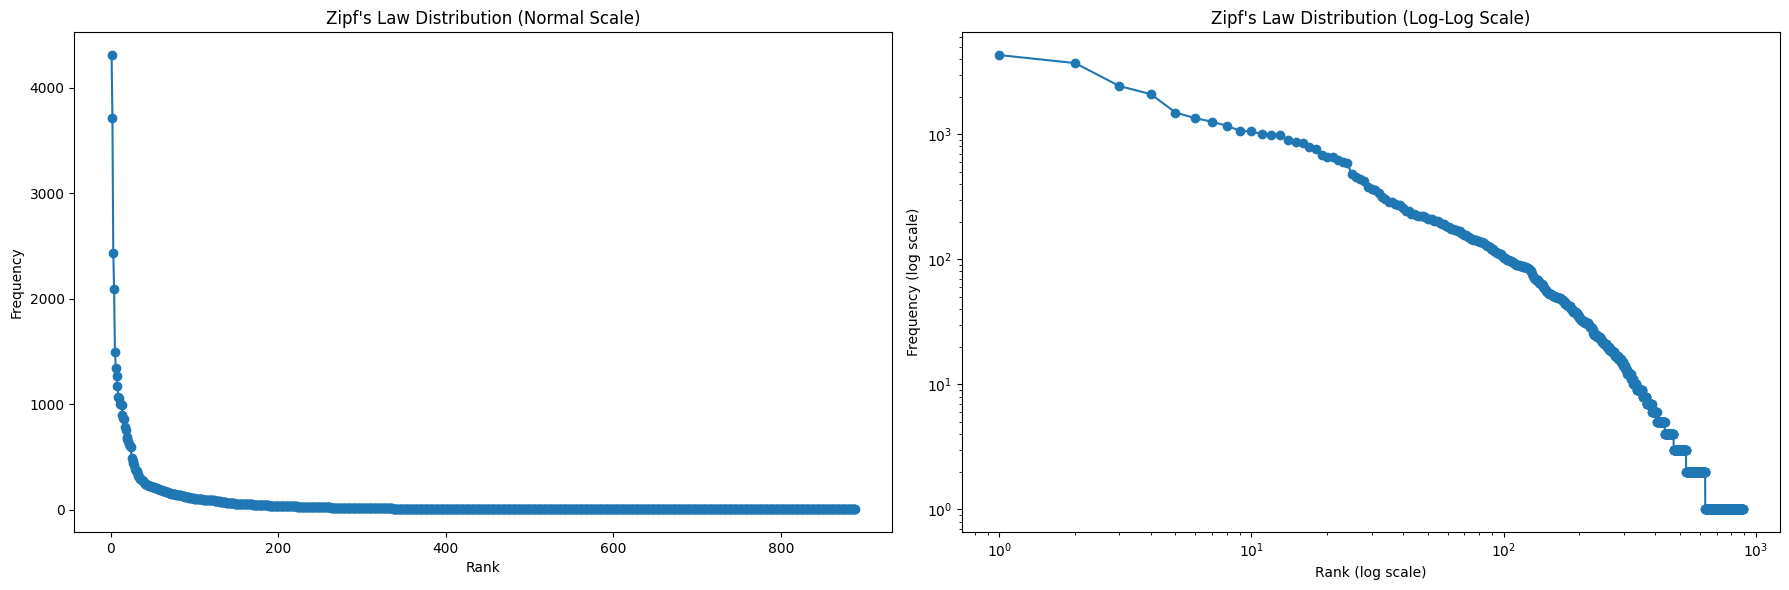

In [2]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/train.csv', header=None)[0]

# Initialize the tokenizer and fit it on the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

# Obtain the word counts
word_counts = tokenizer.word_counts
sorted_counts = sorted(word_counts.values(), reverse=True)

# Generate the Zipf's Law plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Normal plot
ax1.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("Zipf's Law Distribution (Normal Scale)")

# Log-log plot
ax2.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Rank (log scale)")
ax2.set_ylabel("Frequency (log scale)")
ax2.set_title("Zipf's Law Distribution (Log-Log Scale)")

plt.tight_layout()
plt.show()


In [3]:
 default_hyperparams = {'vocab_size': 500, 'embedding_dim': 768, 'epochs': 5, 'batch_size': 32}
        self.hyperparams = {**default_hyperparams, **hyperparams}
        default_config = {'lemmatize':False, 'stem':False, 'remove_stopwords':False, 'custom_stopwords':None, 'padding':'pre'}

IndentationError: unexpected indent (276145634.py, line 2)

In [5]:
tf.keras.utils.set_random_seed(42)

# Define the hyperparameters and training configuration
vocab_size = [100, 250, 500, 750, 889]
embedding_dim = [500, 750, 1024]
lemmatize = [True, False]
stem = [True, False]
remove_stopwords = [True, False]
use_class_weights = [True, False]
use_augmented_data = [True, False]

hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

total_combinations = len(vocab_size) * len(embedding_dim) * len(lemmatize) * len(stem) * len(remove_stopwords) * len(use_class_weights) * len(use_augmented_data)
completed_combinations = 0

for vs in vocab_size:
    for ed in embedding_dim:
        for lem in lemmatize:
            for st in stem:
                for rs in remove_stopwords:
                    for ucw in use_class_weights:
                        for uad in use_augmented_data:
                            completed_combinations += 1
                            progress = (completed_combinations / total_combinations) * 100
                            print(f"Progress: {progress:.2f}%")
                            # Update hyperparams and train_config
                            hyperparams['vocab_size'] = vs
                            hyperparams['embedding_dim'] = ed
                            train_config['lemmatize'] = lem
                            train_config['stem'] = st
                            train_config['remove_stopwords'] = rs
                            train_config['use_class_weights'] = ucw
                            train_config['use_augmented_data'] = uad
                            model = Sequential()
                            model.add(GlobalMaxPooling1D())
                            model.add(Dense(64, activation="relu"))
                            basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"testing_vs{vs}_ed{ed}_lem{lem}_st{st}_rs{rs}_ucw{ucw}_uad{uad}", save_results=True, results_file_name="preprocessing.csv")
                            basic.train_model()
                            basic.print_training_information()
                            basic.evaluate_model()

Progress: 0.21%
Training model 2/2

Average Training Accuracy: 0.8205002546310425
Average Training F1: 0.5962147414684296
Average Training Loss: 0.25073283165693283
Average Validation Accuracy: 0.7705555558204651
Average Validation F1: 0.34843502938747406
Average Validation Loss: 0.7904747426509857
Best Model Validation Accuracy: 0.7788888812065125
Best Model Validation F1: 0.3471929430961609

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8245 - f1_score: 0.2822 - loss: 0.5857
Test accuracy: 0.8141891956329346
Test Macro F1: 0.3489909768104553
Progress: 0.42%
Training model 2/2

Average Training Accuracy: 0.8393820524215698
Average Training F1: 0.6432526409626007
Average Training Loss: 0.25846435129642487
Average Validation Accuracy: 0.7833333313465118
Average Validation F1: 0.3581892400979996
Average Validation Loss: 0.7689788937568665
Best Model Validation Accuracy: 0.7933333516120911
Best Model Validation F1: 0.3705662786960602

Evaluating model...
28/28